In [4]:
import mindspore.ops as ops

def clip_by_norm(clip_norm, t, axis=None):
    """给定张量t和裁剪参数clip_norm，对t进行正则化

    使得t在axes维度上的L2-norm小于等于clip_norm。

    Args:
        t: tensor，数据类型为float
        clip_norm: scalar，数值需大于0；梯度裁剪阈值，数据类型为float
        axis: Union[None, int, tuple(int)]，数据类型为int32；计算L2-norm参考的维度，如为Norm，则参考所有维度
    """

    # 计算L2-norm
    t2 =  t * t
    l2sum = t2.sum(axis=axis, keepdims=True)
    pred = l2sum > 0
    # 将加和中等于0的元素替换为1，避免后续出现NaN
    l2sum_safe = ops.select(pred, l2sum, ops.ones_like(l2sum))
    l2norm = ops.select(pred, ops.sqrt(l2sum_safe), l2sum)
    # 比较L2-norm和clip_norm，如L2-norm超过阈值，进行裁剪
    # output(x) = (x * clip_norm)/max(|x|, clip_norm)
    intermediate = t * clip_norm
    cond = l2norm > clip_norm
    t_clip = intermediate / ops.select(cond, l2norm, clip_norm)

    return t_clip

In [5]:
import mindspore
from mindspore import Tensor

clip = 1.0
t = Tensor([1, 2, 3, 4], mindspore.float32)
clip_by_norm(clip, t)

<class 'mindspore.common.tensor.Tensor'>


Tensor(shape=[4], dtype=Float32, value= [ 1.82574183e-01,  3.65148365e-01,  5.47722518e-01,  7.30296731e-01])

In [34]:
a = Tensor([True, True, False])
a.shape[0]

3

In [36]:
# a = a.astype(mindspore.float32).reshape((-1,))
# print(a)
a = a.reshape((-1,))
b = a.sum().asnumpy()
print(type(b))
print(b)
print(b + 0.0)
print(f'{b: 5.3f}')

<class 'numpy.ndarray'>
2
2.0
 2.000


In [33]:
a = [1, 2, 4, 5, 6, 7]
b = [2, 3, 4, 5]
print(Tensor(a) == Tensor(b))

[False False  True  True]


In [4]:
from graphviz import Digraph

# Define the nodes in the encoder
nodes = ['Multi-Head Attention', 'Add & Norm', 'Feed-Forward', 'Add & Norm']

# Define the edges between the nodes
edges = [('Multi-Head Attention', 'Add & Norm'), ('Add & Norm', 'Feed-Forward'), ('Feed-Forward', 'Add & Norm')]

# Create a new graph and set the style
dot = Digraph(comment='Transformer Encoder', format='png')
dot.attr(rankdir='LR', size='8,5')

# Add the nodes to the graph
for node in nodes:
    dot.node(node)

# Add the edges to the graph
for edge in edges:
    dot.edge(edge[0], edge[1])

# Render the graph
dot.render('encoder', view=True)

'encoder.png'

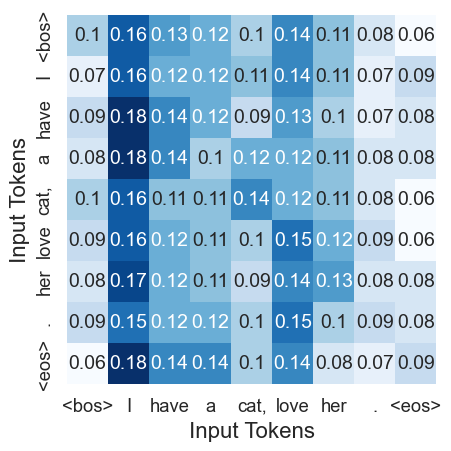

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tokens = ["<bos>", "I", "have", "a", "cat,", "love", "her", ".", "<eos>"]
scores = np.array([[0.10, 0.16, 0.13, 0.12, 0.10, 0.14, 0.11, 0.08, 0.06],
                   [0.07, 0.16, 0.12, 0.12, 0.11, 0.14, 0.11, 0.07, 0.09],
                   [0.09, 0.18, 0.14, 0.12, 0.09, 0.13, 0.10, 0.07, 0.08],
                   [0.08, 0.18, 0.14, 0.10, 0.12, 0.12, 0.11, 0.08, 0.08],
                   [0.10, 0.16, 0.11, 0.11, 0.14, 0.12, 0.11, 0.08, 0.06],
                   [0.09, 0.16, 0.12, 0.11, 0.10, 0.15, 0.12, 0.09, 0.06],
                   [0.08, 0.17, 0.12, 0.11, 0.09, 0.14, 0.13, 0.08, 0.08],
                   [0.09, 0.15, 0.12, 0.12, 0.10, 0.15, 0.10, 0.09, 0.08],
                   [0.06, 0.18, 0.14, 0.14, 0.10, 0.14, 0.08, 0.07, 0.09]])

sns.set(font_scale=1.2)
ax = sns.heatmap(scores,
                 cmap="Blues",
                 annot=True,
                 square=True,
                 xticklabels=tokens,
                 yticklabels=tokens,
                 annot_kws={"fontsize": 14},
                 cbar=False)
plt.xlabel("Input Tokens", fontsize=16)
plt.ylabel("Input Tokens", fontsize=16)
plt.show()